In [1]:
from pyscheduling.SMSP.sijwiCi import sijwiCi_Instance

%load_ext autoreload
%load_ext pycodestyle_magic
%autoreload 2

In [2]:
instance = sijwiCi_Instance.generate_random(10)

In [3]:
import pyscheduling.SMSP.risijwiTi as smsp

In [4]:
instance = smsp.risijwiTi_Instance.generate_random(10)

In [5]:
solution = smsp.Heuristics.ACTS_WSECi(instance)
print(solution)

Search stopped with status : FEASIBLE
 Solution is : 
 Objective : 2966
Job_schedule (job_id , start_time , completion_time) | objective
(2, 0, 3) : (8, 3, 13) : (4, 13, 33) : (6, 44, 255) : (3, 255, 394) : (0, 394, 492) : (5, 492, 623) : (7, 623, 766) : (1, 766, 939) : (9, 939, 1132) | 2966 
Runtime is : 0.00016063300427049398s 
time to best is : -1s 



In [6]:
print(instance)

risijwiTi_Instance(n=10)
(instance_name=)
(P=[35, 62, 3, 25, 9, 47, 75, 49, 4, 66])
(W=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
(R=[1, 92, 0, 46, 3, 40, 44, 66, 2, 111])
(D=[161, 337, 97, 253, 107, 232, 131, 269, 134, 252])
(S=[[0, 114, 50, 66, 49, 84, 91, 81, 47, 98], [114, 0, 54, 54, 19, 116, 143, 102, 61, 127], [24, 37, 0, 38, 7, 24, 140, 76, 6, 89], [63, 58, 7, 0, 35, 71, 115, 70, 27, 73], [47, 119, 17, 29, 0, 83, 136, 49, 14, 54], [74, 104, 47, 92, 86, 0, 99, 94, 32, 108], [118, 140, 137, 114, 27, 139, 0, 135, 99, 132], [83, 111, 81, 51, 83, 96, 125, 0, 85, 131], [52, 60, 7, 28, 11, 45, 30, 65, 0, 121], [110, 124, 72, 106, 99, 107, 145, 127, 121, 0]])


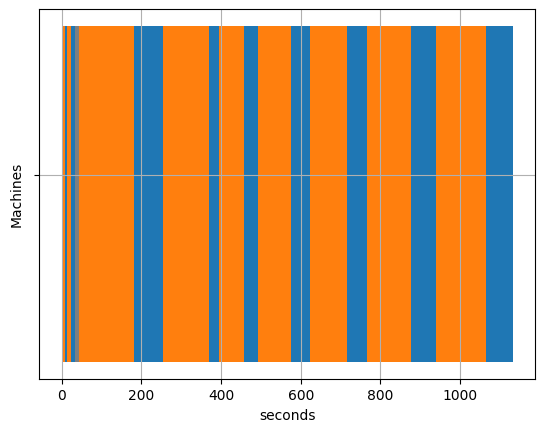

In [7]:
solution.best_solution.plot()